In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import STL
import statsmodels.tsa.api as smt

In [2]:
train = pd.read_csv('./train.csv', index_col=[0], parse_dates=[0])

In [3]:
train = train[['cr_ketetapan_total_bkn_sum', 'giro', 'deposito', 'kewajiban_lain', 'tabungan','rata_dpk_mingguan', 'cash_in_kantor', 'cash_out_kantor', 'cash_in_echannel','cash_out_echannel', 'kas_kantor','kas_echannel']]

In [4]:
train.insert( 8,'kas_kantor_ytd', train.kas_kantor.shift())

In [5]:
train.insert( 11,'kas_echannel_ytd', train.kas_echannel.shift())

In [6]:
train

,cr_ketetapan_total_bkn_sum,giro,deposito,kewajiban_lain,tabungan,rata_dpk_mingguan,cash_in_kantor,cash_out_kantor,kas_kantor_ytd,cash_in_echannel,cash_out_echannel,kas_echannel_ytd,kas_kantor,kas_echannel
periode,,,,,,,,,,,,,,
2019-07-31,3.0,9.867358e+11,8.048153e+11,1.419685e+10,7.072647e+11,3.135744e+11,1.436722e+11,-1.106104e+11,NaN,7.303000e+08,-1.304400e+09,NaN,1.928940e+09,2.939100e+09
2019-08-01,3.0,8.962459e+11,8.125611e+11,1.234062e+10,7.011995e+11,3.135744e+11,3.144131e+11,-6.710987e+10,1.928940e+09,7.322000e+08,-8.321500e+08,2.939100e+09,2.492322e+11,2.839150e+09
2019-08-02,3.0,9.059714e+11,8.127225e+11,1.182022e+10,6.922787e+11,3.135744e+11,1.251294e+09,-1.142332e+09,2.492322e+11,1.169800e+09,-6.214000e+08,2.839150e+09,2.493411e+11,3.387550e+09
2019-08-03,3.0,9.057127e+11,8.127253e+11,1.199640e+10,6.867224e+11,3.135744e+11,0.000000e+00,0.000000e+00,2.493411e+11,9.134500e+08,-4.240500e+08,3.387550e+09,2.493411e+11,3.876950e+09
2019-08-04,3.0,9.788347e+11,8.124711e+11,1.232962e+10,6.813438e+11,3.135744e+11,9.883331e+10,-8.729274e+10,2.493411e+11,7.752500e+08,-7.779500e+08,3.876950e+09,2.608817e+11,3.874250e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-26,3.0,6.770562e+11,7.984164e+11,1.234267e+10,7.260305e+11,2.978684e+11,0.000000e+00,0.000000e+00,1.123736e+13,4.692000e+08,-2.264000e+08,4.843000e+09,1.123736e+13,5.085800e+09
2020-09-27,3.0,8.005756e+11,7.979421e+11,1.226298e+10,7.243814e+11,2.978684e+11,6.466720e+10,-7.829833e+10,1.123736e+13,5.272500e+08,-6.187500e+08,5.085800e+09,1.122373e+13,4.994300e+09
2020-09-28,3.0,1.531154e+12,7.961238e+11,1.521195e+10,7.234264e+11,2.978684e+11,1.264345e+11,-8.203374e+10,1.122373e+13,7.438000e+08,-5.562000e+08,4.994300e+09,1.126813e+13,5.181900e+09


In [7]:
train.head()

,cr_ketetapan_total_bkn_sum,giro,deposito,kewajiban_lain,tabungan,rata_dpk_mingguan,cash_in_kantor,cash_out_kantor,kas_kantor_ytd,cash_in_echannel,cash_out_echannel,kas_echannel_ytd,kas_kantor,kas_echannel
periode,,,,,,,,,,,,,,
2019-07-31,3.0,9.867358e+11,8.048153e+11,1.419685e+10,7.072647e+11,3.135744e+11,1.436722e+11,-1.106104e+11,NaN,7.303000e+08,-1.304400e+09,NaN,1.928940e+09,2.939100e+09
2019-08-01,3.0,8.962459e+11,8.125611e+11,1.234062e+10,7.011995e+11,3.135744e+11,3.144131e+11,-6.710987e+10,1.928940e+09,7.322000e+08,-8.321500e+08,2.939100e+09,2.492322e+11,2.839150e+09
2019-08-02,3.0,9.059714e+11,8.127225e+11,1.182022e+10,6.922787e+11,3.135744e+11,1.251294e+09,-1.142332e+09,2.492322e+11,1.169800e+09,-6.214000e+08,2.839150e+09,2.493411e+11,3.387550e+09
2019-08-03,3.0,9.057127e+11,8.127253e+11,1.199640e+10,6.867224e+11,3.135744e+11,0.000000e+00,0.000000e+00,2.493411e+11,9.134500e+08,-4.240500e+08,3.387550e+09,2.493411e+11,3.876950e+09
2019-08-04,3.0,9.788347e+11,8.124711e+11,1.232962e+10,6.813438e+11,3.135744e+11,9.883331e+10,-8.729274e+10,2.493411e+11,7.752500e+08,-7.779500e+08,3.876950e+09,2.608817e+11,3.874250e+09


In [8]:
len(train.columns.values)

14

In [9]:
info = pd.read_csv('./data_description.csv')
pd.set_option('display.max_colwidth', -1)
info

,variabel,sample Data,Deskripsi
0,cash_in_echannel,7.924471e+09,Total Kas Masuk pada kas eChannel (ATM dan CRM)
1,cash_out_echannel,7.924471e+09,Total Kas keluar pada kas eChannel (ATM dan CRM)
2,cash_in_kantor,1.372300e+10,Total kas masuk pada kas kantor
3,cash_out_kantor,-2.767644e+10,Total kas keluar pada kas kantor
4,cr_ketetapan_total_bkn_sum,4.350000e+00,Maksimum cash ratio yang dii tetapkan kantor pusat
5,giro,5.355247e+10,Total simpanan giro
6,deposito,1.344615e+10,Total simpanan deposito
7,kewajiban_lain,3.490872e+09,"Simpanan selain giro tabungan dan deposito ,salah satunya adalah surat berharga yang diterbitkan"
8,tabungan,1.659893e+11,Total simpanan tabungan
9,rata_dpk_mingguan,2.401906e+11,rata - rata saldo DPK mingguan


### Show Raw Data

In [10]:
# plot time series and the corresponding distribution
def plot_all(df):
    cols = df.columns
    fig, ax = plt.subplots(len(cols), 2, figsize=(18,len(cols)*3), gridspec_kw={'width_ratios': [1, 3]})
    colors = sns.color_palette()
    colors += colors
    ylims = [1.8e-9, 1.8e-9, 1.2e-11, 1.4e-11, 1.75e-12, 7e-12, 2.3e-10, 1.3e-11, 1.3e-11, 1.1e-13, 6.5e-10]
    for i, (col, ylim) in enumerate(zip(cols, ylims)):
        sns.distplot(df[col], ax=ax[i,0], color=colors[i])
        ax[i,1].plot(df.index, df[col], color=colors[i])
        ax[i,1].set_title(col)
        ax[i,1].grid()
        ax[i,0].set_ylim(0,ylim)
    plt.tight_layout()

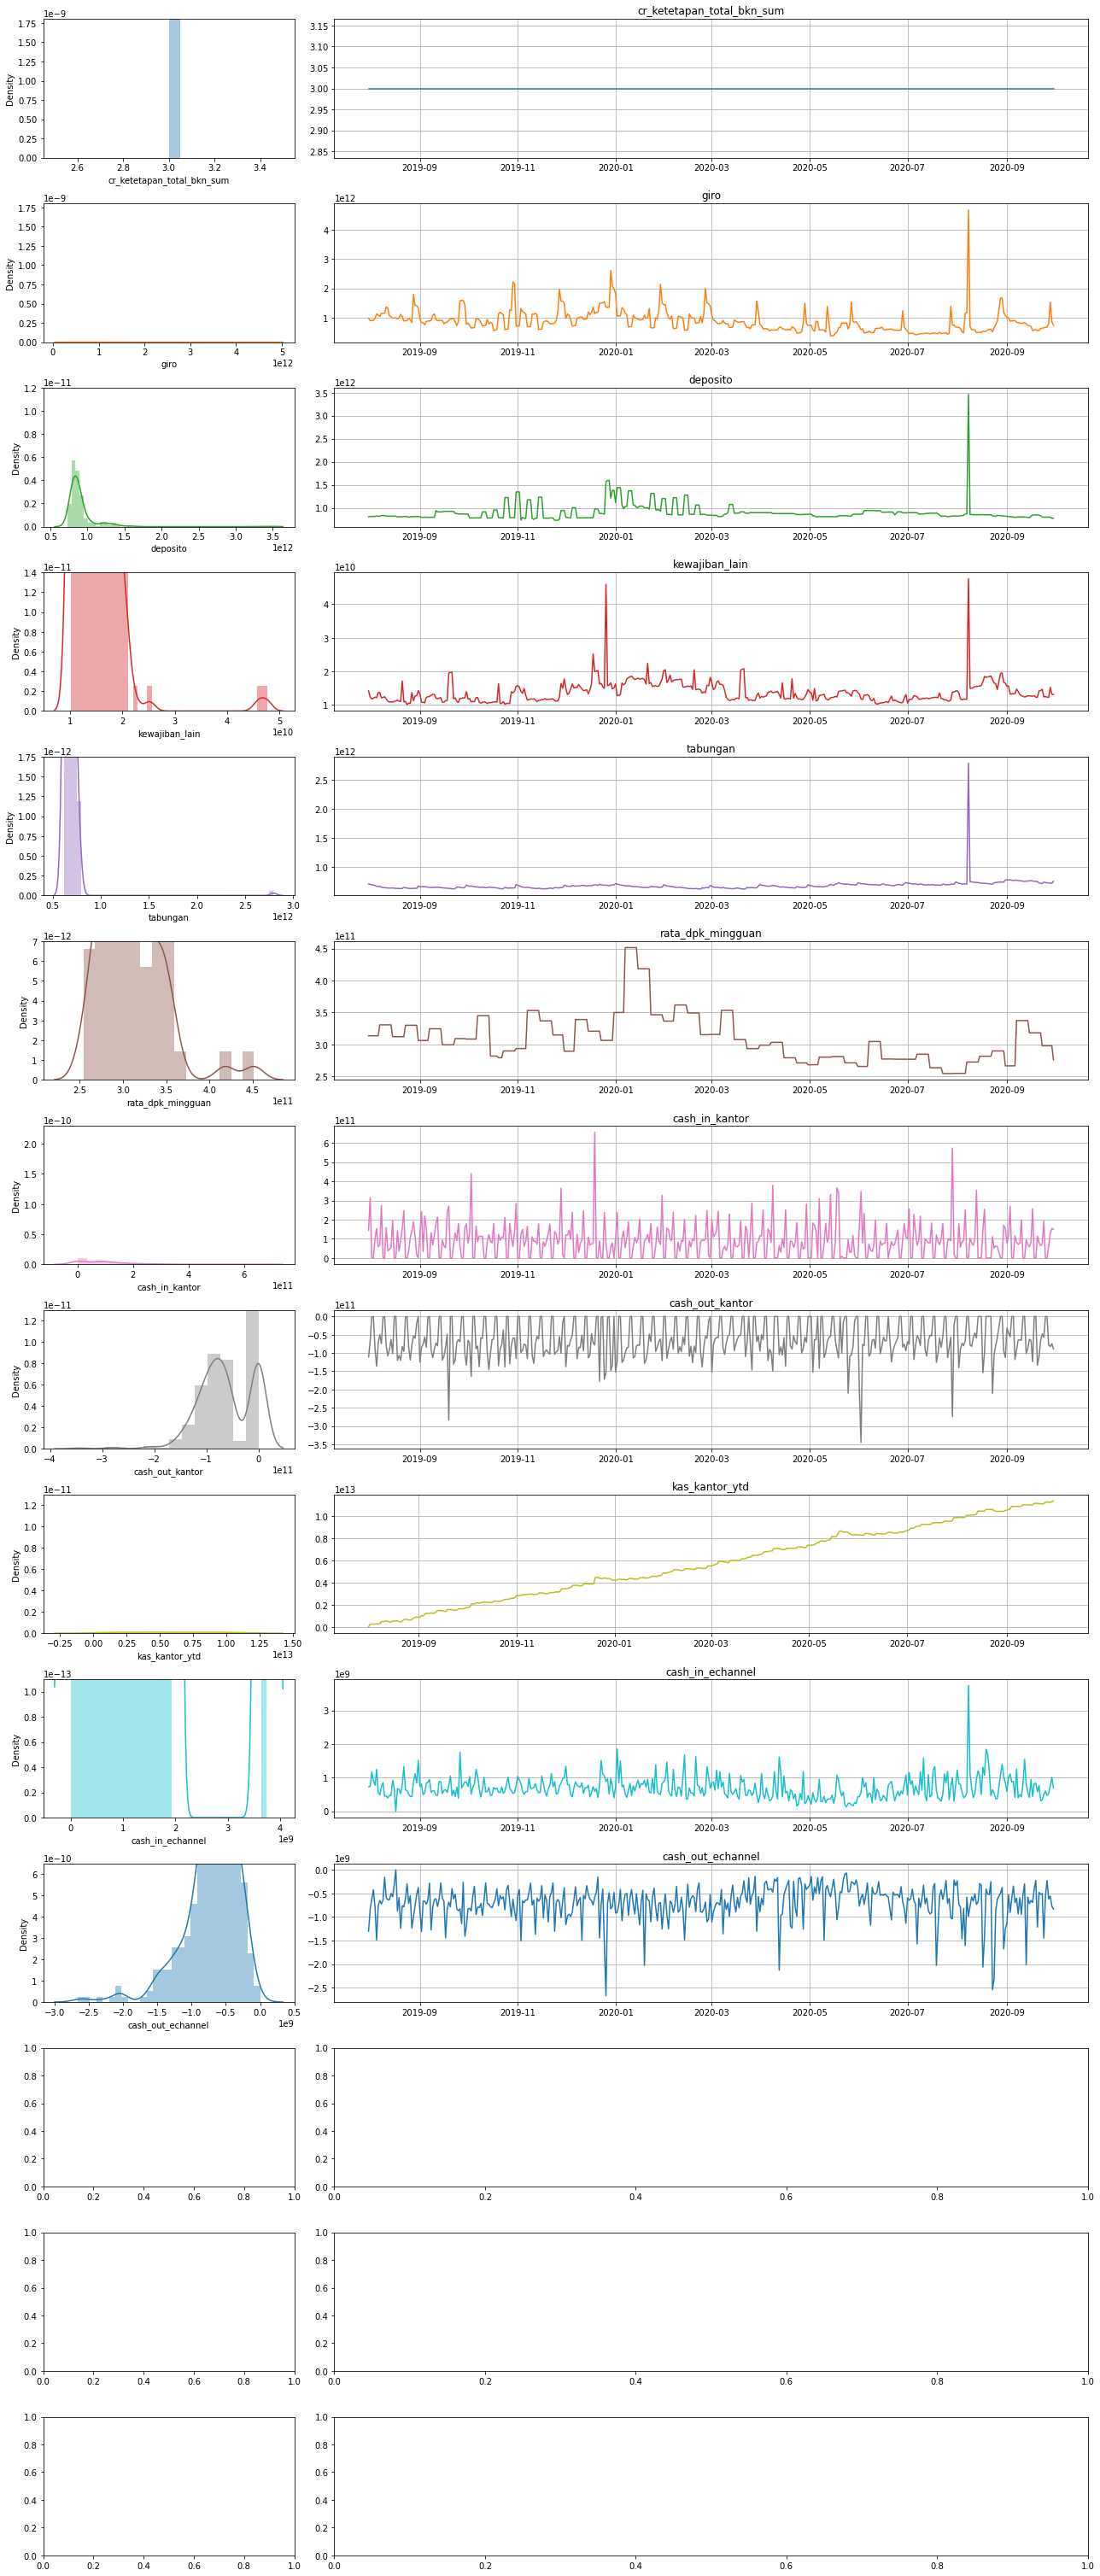

In [11]:
plot_all(train)

### Targets Check

<AxesSubplot:xlabel='periode'>

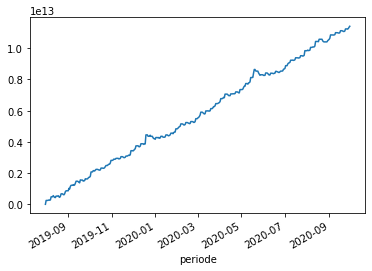

In [12]:
train.kas_kantor.plot()

<AxesSubplot:xlabel='periode'>

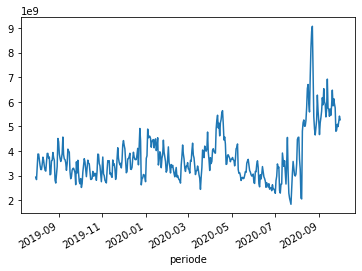

In [13]:
train.kas_echannel.plot()

In [14]:
corr = train.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,cr_ketetapan_total_bkn_sum,giro,deposito,kewajiban_lain,tabungan,rata_dpk_mingguan,cash_in_kantor,cash_out_kantor,kas_kantor_ytd,cash_in_echannel,cash_out_echannel,kas_echannel_ytd,kas_kantor,kas_echannel
cr_ketetapan_total_bkn_sum,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
giro,nan,1.00,0.34,0.44,0.38,0.21,-0.03,-0.05,-0.34,0.29,-0.13,-0.10,-0.34,-0.05
deposito,nan,0.34,1.00,0.53,0.59,0.24,-0.09,0.15,-0.05,0.37,-0.03,-0.17,-0.05,-0.06
kewajiban_lain,nan,0.44,0.53,1.00,0.48,0.23,-0.03,0.01,0.08,0.35,-0.21,0.17,0.08,0.21
tabungan,nan,0.38,0.59,0.48,1.00,-0.16,-0.03,0.06,0.31,0.43,-0.05,0.06,0.31,0.19
rata_dpk_mingguan,nan,0.21,0.24,0.23,-0.16,1.00,-0.05,-0.02,-0.43,0.07,-0.08,0.04,-0.43,0.04
cash_in_kantor,nan,-0.03,-0.09,-0.03,-0.03,-0.05,1.00,-0.65,-0.05,-0.00,-0.36,-0.03,-0.03,-0.16
cash_out_kantor,nan,-0.05,0.15,0.01,0.06,-0.02,-0.65,1.00,0.06,0.08,0.50,-0.08,0.06,0.13
kas_kantor_ytd,nan,-0.34,-0.05,0.08,0.31,-0.43,-0.05,0.06,1.00,-0.02,0.04,0.39,1.00,0.39
cash_in_echannel,nan,0.29,0.37,0.35,0.43,0.07,-0.00,0.08,-0.02,1.00,-0.21,-0.00,-0.02,0.25


In [15]:
train.corrwith(train.kas_kantor)

cr_ketetapan_total_bkn_sum   NaN      
giro                         -0.340332
deposito                     -0.047539
kewajiban_lain                0.076751
tabungan                      0.309455
rata_dpk_mingguan            -0.432738
cash_in_kantor               -0.030120
cash_out_kantor               0.060684
kas_kantor_ytd                0.999761
cash_in_echannel             -0.023307
cash_out_echannel             0.041362
kas_echannel_ytd              0.383465
kas_kantor                    1.000000
kas_echannel                  0.389325
dtype: float64

In [16]:
train.corrwith(train.kas_echannel)

cr_ketetapan_total_bkn_sum   NaN      
giro                         -0.050334
deposito                     -0.063379
kewajiban_lain                0.208822
tabungan                      0.188962
rata_dpk_mingguan             0.036299
cash_in_kantor               -0.163533
cash_out_kantor               0.128508
kas_kantor_ytd                0.390275
cash_in_echannel              0.254406
cash_out_echannel             0.038900
kas_echannel_ytd              0.903405
kas_kantor                    0.389325
kas_echannel                  1.000000
dtype: float64

ARIMA
KALMAN FILTER
LSTM


### RNN - LSTM

In [116]:
training_set = train.iloc[:325, 12:13].values
testing_set = train.iloc[325:, 12:13].values

In [117]:
from sklearn.preprocessing import MinMaxScaler

In [118]:
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [119]:
X_train = []
y_train = []
for i in range(60, 325):
    X_train.append(training_set_scaled[i-60:i])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [120]:
y_train

array([0.1949267 , 0.20011934, 0.20134805, 0.20806096, 0.2400369 ,
       0.2400369 , 0.2400369 , 0.24902433, 0.24965332, 0.24678669,
       0.25299673, 0.25912217, 0.25912217, 0.25912217, 0.25727819,
       0.25453533, 0.25322901, 0.25504454, 0.26863702, 0.26863702,
       0.26863702, 0.26718601, 0.26750743, 0.2713071 , 0.27942561,
       0.28781231, 0.28781231, 0.28781231, 0.29374079, 0.29730974,
       0.29750257, 0.30608668, 0.32574527, 0.32574527, 0.32574527,
       0.32880319, 0.33533441, 0.33374942, 0.33469495, 0.34059256,
       0.34059256, 0.34059256, 0.34107284, 0.3363711 , 0.33784626,
       0.33981401, 0.35333435, 0.35333435, 0.35333435, 0.35045837,
       0.3463823 , 0.34627424, 0.34922084, 0.35788067, 0.35788067,
       0.35788067, 0.36181305, 0.36489014, 0.36257785, 0.36715172,
       0.39761555, 0.39762084, 0.39762084, 0.3956871 , 0.40030873,
       0.40772331, 0.41161756, 0.43323268, 0.43325108, 0.43325108,
       0.43409792, 0.42760383, 0.42662393, 0.43151777, 0.44917

In [121]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [122]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [123]:
regressor = Sequential()

In [124]:
regressor.add(LSTM(units = 30, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 30, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 30, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 30))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [125]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [126]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
9/9 [==============================] - 11s 75ms/step - loss: 0.2412
Epoch 2/100
9/9 [==============================] - 1s 78ms/step - loss: 0.0706
Epoch 3/100
9/9 [==============================] - 1s 81ms/step - loss: 0.0354
Epoch 4/100
9/9 [==============================] - 1s 81ms/step - loss: 0.0181
Epoch 5/100
9/9 [==============================] - 1s 82ms/step - loss: 0.0139
Epoch 6/100
9/9 [==============================] - 1s 80ms/step - loss: 0.0094
Epoch 7/100
9/9 [==============================] - 1s 83ms/step - loss: 0.0086
Epoch 8/100
9/9 [==============================] - 1s 78ms/step - loss: 0.0121
Epoch 9/100
9/9 [==============================] - 1s 78ms/step - loss: 0.0094
Epoch 10/100
9/9 [==============================] - 1s 80ms/step - loss: 0.0075
Epoch 11/100
9/9 [==============================] - 1s 81ms/step - loss: 0.0098
Epoch 12/100
9/9 [==============================] - 1s 93ms/step - loss: 0.0098
Epoch 13/100
9/9 [==============================

In [127]:
inputs = sc.transform(testing_set)

In [128]:
inputs

array([[0.98173426],
       [0.9784682 ],
       [0.97768788],
       [0.98793145],
       [0.98793145],
       [0.98793145],
       [0.98989127],
       [1.00188609],
       [1.00370152],
       [1.00727284],
       [1.0281576 ],
       [1.0281576 ],
       [1.0281576 ],
       [1.04082223],
       [1.0476721 ],
       [1.0491307 ],
       [1.05269337],
       [1.06875167],
       [1.06875167],
       [1.06875167],
       [1.06960114],
       [1.06741693],
       [1.06876642],
       [1.07195864],
       [1.08696106],
       [1.08696106],
       [1.08696106],
       [1.08640987],
       [1.08474361],
       [1.08603545],
       [1.08762166],
       [1.10197575],
       [1.10197575],
       [1.10197575],
       [1.09920194],
       [1.10092197],
       [1.1047415 ],
       [1.13923195],
       [1.13923422],
       [1.13923422],
       [1.13923422],
       [1.14373309],
       [1.13994135],
       [1.14134798],
       [1.14262437],
       [1.16402355],
       [1.16402355],
       [1.164

In [129]:
X_test = []
for i in range(60, 100):
    X_test.append(testing_set[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [130]:
predicted_kas_kantor = regressor.predict(X_test)
predicted_kas_kantor = sc.inverse_transform(predicted_kas_kantor)

In [131]:
predicted_kas_kantor

array([[9.582249e+12],
       [9.582249e+12],
       [9.582249e+12],
       [9.582249e+12],
       [9.582249e+12],
       [9.582249e+12],
       [9.582249e+12],
       [9.582249e+12],
       [9.582249e+12],
       [9.582249e+12],
       [9.582249e+12],
       [9.582249e+12],
       [9.582249e+12],
       [9.582249e+12],
       [9.582249e+12],
       [9.582249e+12],
       [9.582249e+12],
       [9.582249e+12],
       [9.582249e+12],
       [9.582249e+12],
       [9.582249e+12],
       [9.582249e+12],
       [9.582249e+12],
       [9.582249e+12],
       [9.582249e+12],
       [9.582249e+12],
       [9.582249e+12],
       [9.582249e+12],
       [9.582249e+12],
       [9.582249e+12],
       [9.582249e+12],
       [9.582249e+12],
       [9.582249e+12],
       [9.582249e+12],
       [9.582249e+12],
       [9.582249e+12],
       [9.582249e+12],
       [9.582249e+12],
       [9.582249e+12],
       [9.582249e+12]], dtype=float32)

In [132]:
import matplotlib.pyplot as plt

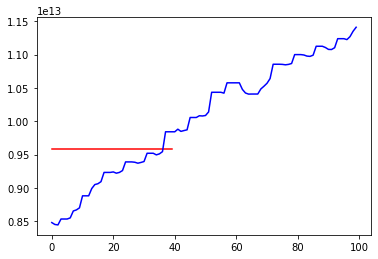

In [133]:
plt.plot(predicted_kas_kantor, color = 'red', label = 'prediction')
plt.plot(train.kas_kantor[325:].values, color = 'blue', label = 'real')

In [85]:
train.kas_kantor[325:].values

array([8.48196038e+12, 8.45374872e+12, 8.44700846e+12, 8.53549051e+12,
       8.53549051e+12, 8.53549051e+12, 8.55241904e+12, 8.65602799e+12,
       8.67170934e+12, 8.70255771e+12, 8.88295622e+12, 8.88295622e+12,
       8.88295622e+12, 8.99235085e+12, 9.05151872e+12, 9.06411781e+12,
       9.09489146e+12, 9.23359993e+12, 9.23359993e+12, 9.23359993e+12,
       9.24093750e+12, 9.22207074e+12, 9.23372740e+12, 9.26130114e+12,
       9.39088917e+12, 9.39088917e+12, 9.39088917e+12, 9.38612811e+12,
       9.37173528e+12, 9.38289392e+12, 9.39659532e+12, 9.52058318e+12,
       9.52058318e+12, 9.52058318e+12, 9.49662355e+12, 9.51148084e+12,
       9.54447317e+12, 9.84239504e+12, 9.84241464e+12, 9.84241464e+12,
       9.84241464e+12, 9.88127499e+12, 9.84852274e+12, 9.86067291e+12,
       9.87169811e+12, 1.00565401e+13, 1.00565401e+13, 1.00565401e+13,
       1.00824622e+13, 1.00792378e+13, 1.00864415e+13, 1.01395747e+13,
       1.04343194e+13, 1.04343194e+13, 1.04343194e+13, 1.04343194e+13,
      